In [ ]:
!pip install -q pyLDAvis==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Data Preparation

In [ ]:
import pandas as pd

# Load datasets
# business_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp_dataset/business_FL_output.csv')
business_df = pd.read_csv('/content/drive/MyDrive/CIS 509/CIS 509_Course Project/business_FL_output.csv')
review_df = pd.read_csv('/content/drive/MyDrive/CIS 509/CIS 509_Course Project/filtered_review_FL_output.csv')
business_all_df = pd.read_json('/content/drive/MyDrive/CIS 509/CIS 509_Course Project/yelp_academic_dataset_business.json', lines=True)

# Filter for Japanese restaurants
fl_japanese_restaurants = business_df[business_df['categories'].str.contains("Japanese", na=False)]

# Filter for reviews for Japanese restaurants in Florida
fl_japanese_reviews = review_df[review_df['business_id'].isin(fl_japanese_restaurants['business_id'])]


In [ ]:
fl_japanese_restaurants.to_csv('FL_japanese_restaurants.csv', index=False)

In [ ]:
fl_japanese_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
26,7Du9oW73YcYFmXdtU5aiSg,Kinjo's Japanese Restaurant,2875 Tyrone Blvd N,Saint Petersburg,FL,33710.0,27.797263,-82.733913,3.5,17,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
42,dJfkfBbJz7wi0RgW-ph_Eg,Sake House,5106 E Fowler Ave,Tampa,FL,33617.0,28.055212,-82.399374,3.0,140,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Sushi Bars, Japanese","{'Monday': '11:0-23:0', 'Tuesday': '11:0-2:0',..."
135,71U7MxQEhwitJOm4CQpRwQ,KELP Sushi Joint,"3401 W Bay To Bay Blvd, Ste D",Tampa,FL,33629.0,27.920067,-82.498921,4.0,325,1,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'F...","Japanese, Sushi Bars, Food, Restaurants, Asian...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
178,dUctvEfHQccW_uxtRup2QQ,Tsunami Japanese Steakhouse,2176 Tyrone Blvd N,Saint Petersburg,FL,33710.0,27.789962,-82.726221,3.0,212,1,"{'BusinessParking': ""{'garage': False, 'street...","Steakhouses, Restaurants, Sushi Bars, Japanese","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
251,v8IbZ6wcvdyGqWpbDKDvfA,YO! Sushi,"International Plz, 2223 N Westshore Blvd",Tampa,FL,33607.0,27.964536,-82.520756,4.0,121,0,"{'Alcohol': ""'beer_and_wine'"", 'BikeParking': ...","Sushi Bars, Fast Food, Japanese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


#Why only Florida?
The decision to focus on Florida could be based on specific insights such as market size, customer demographics, or other strategic business reasons. This would not typically involve code, but more of a business analysis.

In [ ]:
# Split the text in each row into words
# This creates a Series of lists
words_series = business_all_df['state'].str.split()

# Explode the Series of lists into a flat Series of words
flat_words_series = words_series.explode()

# Get counts of each unique word
word_counts = flat_words_series.value_counts()

# Convert the Series to a DataFrame
word_counts_df = word_counts.reset_index()
word_counts_df.columns = ['Word', 'Count']

word_counts_df.head()

,Word,Count
0,PA,34039
1,FL,26330
2,TN,12056
3,IN,11247
4,MO,10913


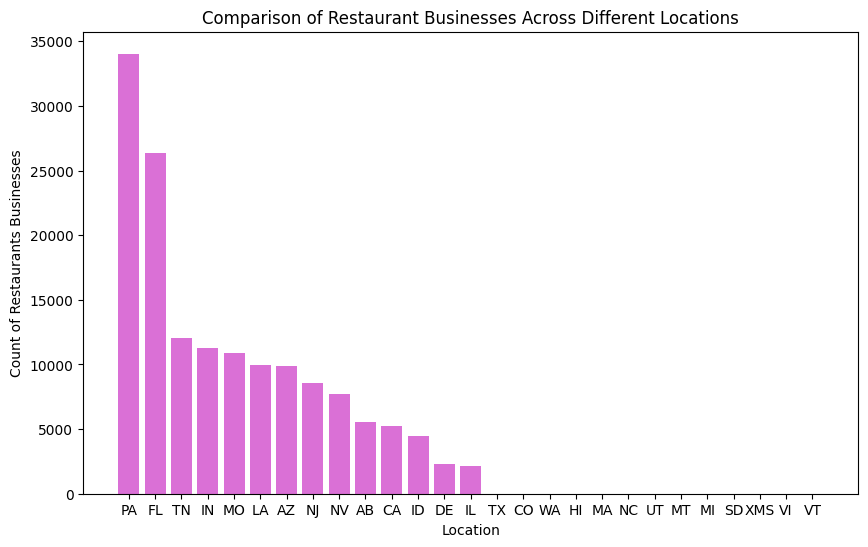

In [ ]:
import matplotlib.pyplot as plt

locations = word_counts_df['Word']
count_of_businesses = word_counts_df['Count']

plt.figure(figsize=(10, 6))
plt.bar(locations, count_of_businesses,  color= 'orchid' )
plt.xlabel('Location')
plt.ylabel('Count of Restaurants Businesses')
plt.title('Comparison of Restaurant Businesses Across Different Locations')
plt.show()

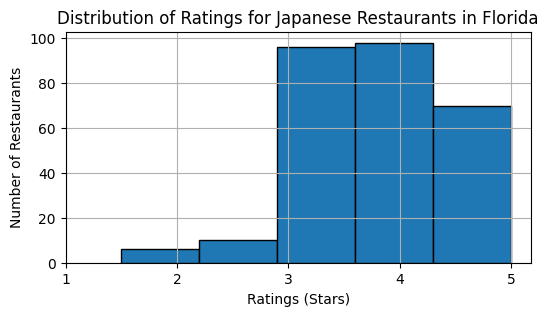

In [ ]:
plt.figure(figsize=(6, 3))
fl_japanese_restaurants['stars'].hist(bins=5, edgecolor='black')
plt.title('Distribution of Ratings for Japanese Restaurants in Florida')
plt.xlabel('Ratings (Stars)')
plt.ylabel('Number of Restaurants')
plt.xticks(range(1, 6))
plt.show()


#Step 2: Exploratory Data Analysis (EDA)
Calculate summary statistics and visualize data from the filtered dataset.

# Why should I choose a Japanese restaurant?
This would involve comparing the average ratings and possibly other metrics like the number of reviews or revenue estimates to make a case for Japanese restaurants.

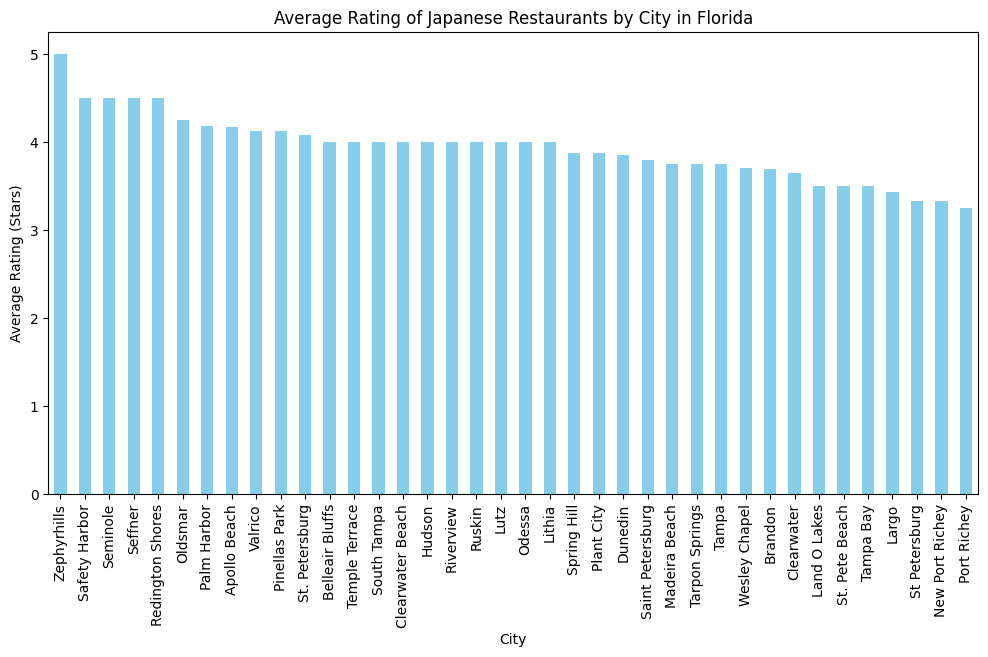

In [ ]:
# Group by city and calculate the average rating
city_ratings = fl_japanese_restaurants.groupby('city')['stars'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating of Japanese Restaurants by City in Florida')
plt.xlabel('City')
plt.ylabel('Average Rating (Stars)')
plt.show()

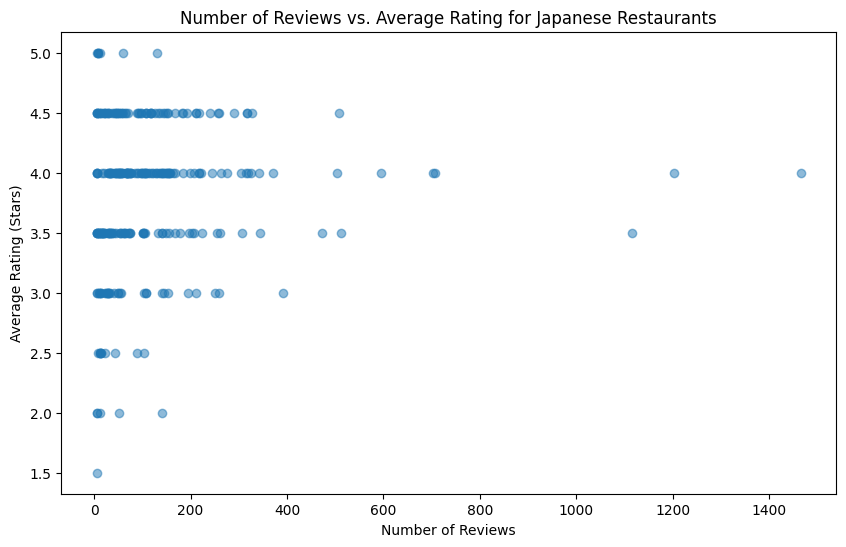

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(fl_japanese_restaurants['review_count'], fl_japanese_restaurants['stars'], alpha=0.5)
plt.title('Number of Reviews vs. Average Rating for Japanese Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating (Stars)')
plt.show()

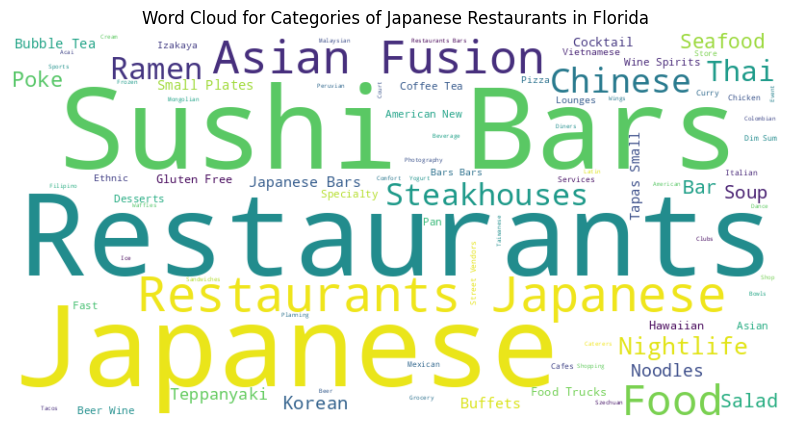

In [ ]:
from wordcloud import WordCloud

# Join all the category strings into one large string
all_categories = ' '.join(fl_japanese_restaurants['categories'].fillna(''))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Categories of Japanese Restaurants in Florida')
plt.show()

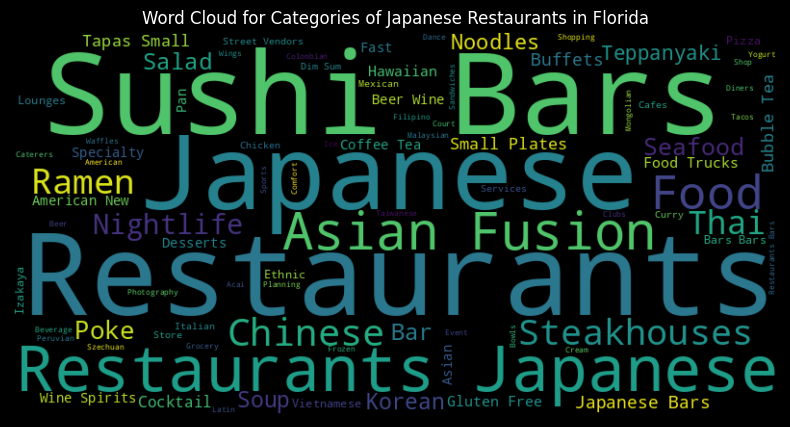

In [ ]:
from wordcloud import WordCloud

# Join all the category strings into one large string
all_categories = ' '.join(fl_japanese_restaurants['categories'].fillna(''))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Categories of Japanese Restaurants in Florida')
plt.show()

In [ ]:
# Calculate the average rating for all restaurants in Florida
avg_rating_all_fl = business_df['stars'].mean()

# Calculate the average rating for Japanese restaurants in Florida
avg_rating_japanese_fl = fl_japanese_restaurants['stars'].mean()

# Compare the average ratings to make a decision
print(f"Average Rating for all restaurants in FL: {avg_rating_all_fl}")
print(f"Average Rating for Japanese restaurants in FL: {avg_rating_japanese_fl}")

if avg_rating_japanese_fl > avg_rating_all_fl:
    print("Japanese restaurants are rated higher on average than other restaurants in Florida, indicating a preference among customers.")
else:
    print("Japanese restaurants have room for improvement or innovation to attract more customers.")

Average Rating for all restaurants in FL: 3.6109570831750855
Average Rating for Japanese restaurants in FL: 3.8125
Japanese restaurants are rated higher on average than other restaurants in Florida, indicating a preference among customers.


# Q2: Why are the reviews on average 3?
# Sentiment Analysis -Text Blob
To understand why the reviews are averaging around a rating of 3, you can perform sentiment analysis and extract common themes that might be causing dissatisfaction:

## New section

In [ ]:
from textblob import TextBlob

# # Assuming 'fl_japanese_restaurants' DataFrame is available with 'text' for review texts
# # Function to calculate sentiment polarity
# def calculate_sentiment(text):
#     return TextBlob(text).sentiment.polarity

# # Apply the function to the reviews
# fl_japanese_restaurants['sentiment_polarity'] = fl_japanese_reviews['text'].apply(calculate_sentiment)

# # Get the average sentiment polarity
# avg_sentiment = fl_japanese_restaurants['sentiment_polarity'].mean()
# print(f"Average sentiment polarity of reviews: {avg_sentiment}")

from textblob import TextBlob
import pandas as pd

# Assuming 'fl_japanese_reviews' DataFrame is already defined and contains a 'text' column with review texts

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment polarity for each review
# Create a new column for sentiment polarity to avoid SettingWithCopyWarning
fl_japanese_reviews['sentiment_polarity'] = fl_japanese_reviews['text'].apply(calculate_sentiment)

# Now, if you wish to calculate the average sentiment polarity across all reviews:
avg_sentiment = fl_japanese_reviews['sentiment_polarity'].mean()
print(f"Average sentiment polarity of reviews: {avg_sentiment}")


Average sentiment polarity of reviews: 0.2757134502089014


<ipython-input-81-caa8490f7e8b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_japanese_reviews['sentiment_polarity'] = fl_japanese_reviews['text'].apply(calculate_sentiment)


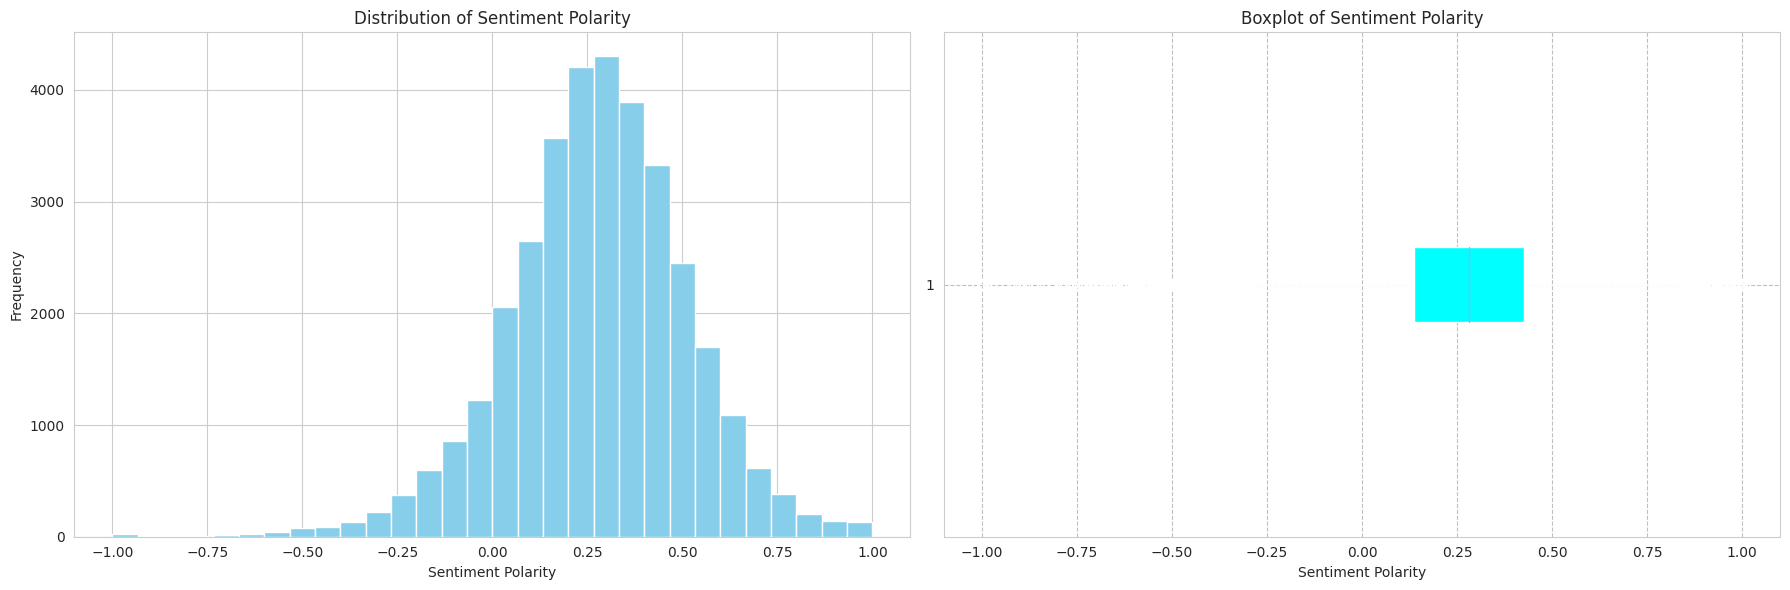

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'fl_japanese_reviews' contains a 'sentiment_polarity' column with calculated sentiment scores

# Set the Seaborn style to 'whitegrid' for better visibility of ticks
sns.set_style('whitegrid')

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram of sentiment polarity
# Set the number of bins, color, and add grid
axes[0].hist(fl_japanese_reviews['sentiment_polarity'], bins=30, color='skyblue')
axes[0].set_title('Distribution of Sentiment Polarity')
axes[0].set_xlabel('Sentiment Polarity')
axes[0].set_ylabel('Frequency')

# Boxplot of sentiment polarity
# Set the color of the boxplot and make it horizontal
axes[1].boxplot(fl_japanese_reviews['sentiment_polarity'], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan'))
axes[1].set_title('Boxplot of Sentiment Polarity')
axes[1].set_xlabel('Sentiment Polarity')

# Set the color of the grid to white for visibility
axes[1].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
axes[1].xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Set axis limits if needed, for example:
# axes[0].set_xlim([-1, 1])
# axes[1].set_xlim([-1, 1])

# Adjust the layout to make sure nothing is cut off
plt.tight_layout()
plt.show()


Histogram (Left Plot):

The histogram shows the frequency distribution of sentiment polarity scores from the reviews.
Most of the reviews have a sentiment polarity score between 0 and 0.25, indicating a generally positive sentiment.
The shape of the histogram is roughly bell-shaped, suggesting a normal-like distribution of sentiment scores, but with a skew towards the positive side (since the peak is to the right of the center).
There are very few reviews with extremely negative sentiment (close to -1), and similarly, there are fewer extremely positive reviews (close to 1) compared to the number of moderately positive reviews.
Boxplot (Right Plot):

The boxplot summarizes the distribution of sentiment polarity scores.
The box represents the interquartile range (IQR), which contains the middle 50% of the scores. The line in the middle of the box is the median, which seems to be slightly above 0, confirming the positive skew seen in the histogram.
The "whiskers" of the boxplot indicate the range of the data, excluding outliers, which extends from roughly -0.25 to 0.6.
There are a number of outliers on both the low and high ends of the sentiment score range, as indicated by the individual points beyond the whiskers. These outliers represent reviews with sentiment scores that are unusually low or high compared to the bulk of the data.
Overall Interpretation:

The majority of the reviews express a positive sentiment towards the Japanese restaurants, with the median sentiment being positive.
There is a variety of sentiment expressed in the reviews, including some that are neutral and some that are negative, but these are less frequent.
The presence of outliers on both ends suggests that while most reviews are positive, there are some customers who had distinctly negative or exceptionally positive experiences.
This kind of analysis can be very useful for understanding customer sentiment towards a product or service, and it could be used to inform business decisions, marketing strategies, and customer service initiatives.

# Identifying outlier reviews

In [ ]:
import pandas as pd

# Calculate IQR
Q1 = fl_japanese_reviews['sentiment_polarity'].quantile(0.25)
Q3 = fl_japanese_reviews['sentiment_polarity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter reviews that are outliers
outliers_df = fl_japanese_reviews[
    (fl_japanese_reviews['sentiment_polarity'] < lower_bound) |
    (fl_japanese_reviews['sentiment_polarity'] > upper_bound)
]

ANalyzing outlier reviews

In [ ]:
# Display the text of the outlier reviews
for index, review in outliers_df.iterrows():
    print(f"Review ID: {index}")
    print(f"Sentiment Polarity: {review['sentiment_polarity']}")
    print(f"Review Text: {review['text']}\n")
    print("---\n")

Streaming output truncated to the last 5000 lines.
---

Review ID: 34436
Sentiment Polarity: 0.9
Review Text: Food was great! The sushi is made to order, so you can customize what you want.  They also offer rice paper which is a great alternative option to seaweed paper.

---

Review ID: 34984
Sentiment Polarity: -0.36333333333333334
Review Text: After waiting and hour for our take out that was promised in 20 minutes, the food was mediocre. Certainly not worth the price. The yakisoba had no flavor and the sushi was poorly constructed. Crab Rangoon was cold and bland.

---

Review ID: 35943
Sentiment Polarity: 1.0
Review Text: Tried the hurricane roll.... AMAZEBALLS! The flavors blended perfectly. I can say that this will be my sushi spot!

---

Review ID: 37115
Sentiment Polarity: 0.8732421874999999
Review Text: Loved it!!! Food is delicious!!!! Best sushi place in town!!!  I don't have to go all the way to Tampa to have great fresh sushi!!! Nice atmosphere and great service!!! Recomme

# Addressing Outliers

In [ ]:
# Example function to process the review text of outliers
def process_outlier_reviews(df):
    for index, review in df.iterrows():
        sentiment = review['sentiment_polarity']
        text = review['text']
        # If the sentiment is low, it might indicate a negative outlier
        if sentiment < lower_bound:
            print(f"Negative outlier found (Sentiment: {sentiment}):")
            # Insert your code for processing negative reviews
        elif sentiment > upper_bound:
            print(f"Positive outlier found (Sentiment: {sentiment}):")
            # Insert your code for processing positive reviews
        print(f"Review Text: {text}\n")
        print("---\n")

# Call the function with the identified outliers
process_outlier_reviews(outliers_df)


Negative outlier found (Sentiment: -0.405029296875):
Review Text: There is nothing like the other pics showed!!! I never give out review on Yelp, but I had to comment on this restaurant! I am a sushi lover, the fish was poorly cut and the sushi rice is tasteless. The dynamite we had was extremely salty and loads of mayos. I took one bite left the rest on the table. This is the worst experience l've ever had in a 4.5 star restaurant, please avoid at all cost!!!

---

Negative outlier found (Sentiment: -0.375):
Review Text: This place is over priced, it was totally empty on a Friday night at 9:30.... Disappointed that I didn't look at the menu before coming here and just looked at the rating. The quality of the food is completely off. They didn't give us utensils to begin with. I am disappointed.

---

Negative outlier found (Sentiment: -0.3125):
Review Text: Their sushi is on par with others in the area like Sushi Ninja and Sushi Maru. I always get either the Volcano, Mexican, or Yummy 

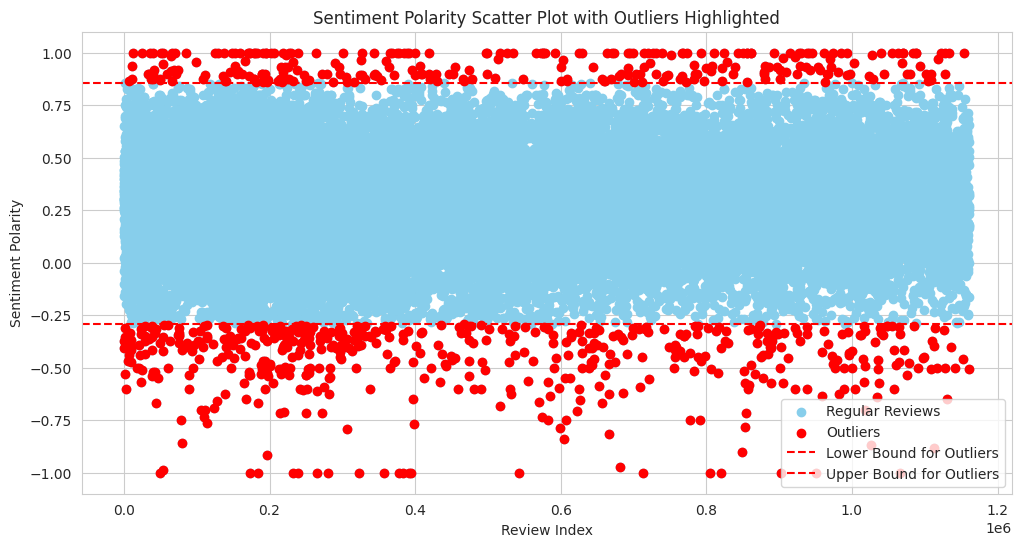

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'fl_japanese_reviews' is your DataFrame and it includes 'sentiment_polarity'

# Define your lower and upper bounds for outliers based on IQR or standard deviation
# Here's an example using the IQR
Q1 = fl_japanese_reviews['sentiment_polarity'].quantile(0.25)
Q3 = fl_japanese_reviews['sentiment_polarity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(fl_japanese_reviews.index, fl_japanese_reviews['sentiment_polarity'], color='skyblue', label='Regular Reviews')
plt.scatter(outliers_df.index, outliers_df['sentiment_polarity'], color='red', label='Outliers')
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound for Outliers')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound for Outliers')
plt.title('Sentiment Polarity Scatter Plot with Outliers Highlighted')
plt.xlabel('Review Index')
plt.ylabel('Sentiment Polarity')
plt.legend()
plt.show()


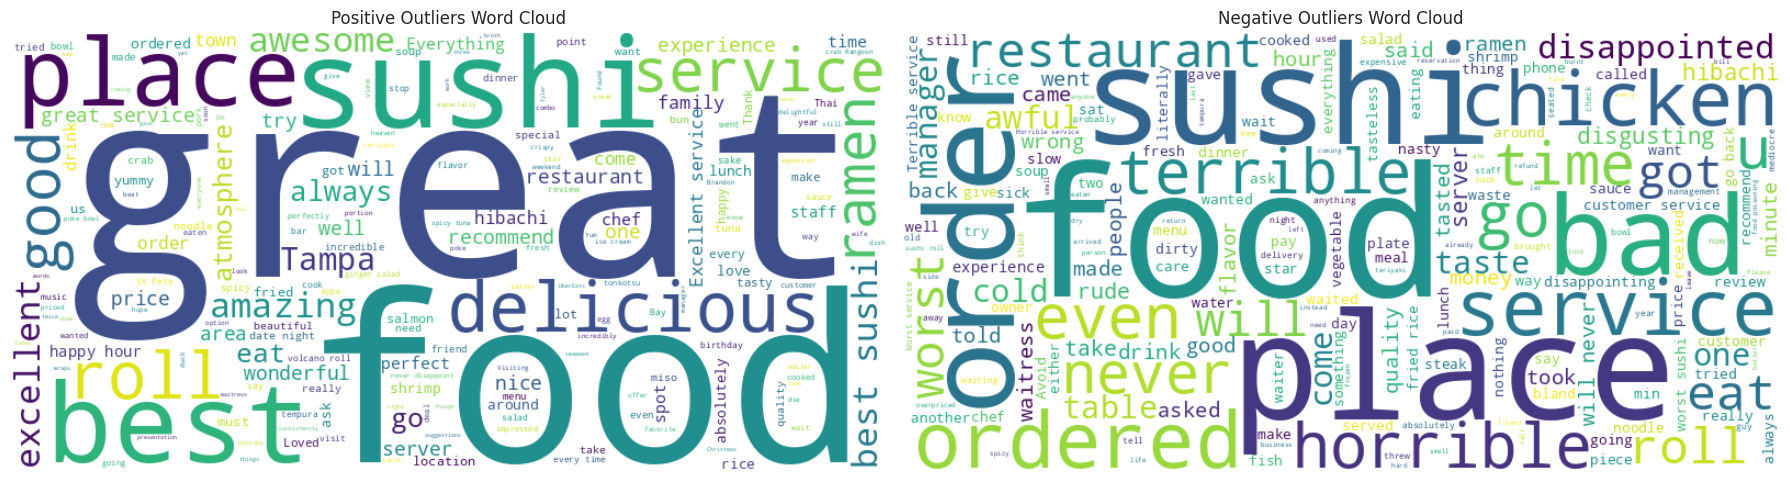

In [ ]:
from wordcloud import WordCloud

# Assuming 'outliers_df' contains the outliers with a 'text' column for review texts
positive_outliers = outliers_df[outliers_df['sentiment_polarity'] > upper_bound]['text']
negative_outliers = outliers_df[outliers_df['sentiment_polarity'] < lower_bound]['text']

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_outliers))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_outliers))

# Display the word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Outliers Word Cloud')
axes[0].axis('off')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Outliers Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Step 3: Sentiment Analysis with LSTM
We'll create a sentiment analysis model using LSTM networks to understand public sentiment towards Japanese restaurants.

In [ ]:
# from sklearn.model_selection import train_test_split

# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense

# # Merge datasets on business_id and filter for Florida and Japanese restaurants
# fl_japanese = pd.merge(fl_japanese_restaurants, fl_japanese_reviews, on='business_id')

# fl_japanese.head()

In [ ]:
# # Create a sentiment column based on stars
# fl_japanese['sentiment'] = fl_japanese['stars_x'].apply(lambda x: 1 if x > 3 else 0)

# # Preprocessing steps here - Ensure the text data is preprocessed
# # Assuming 'text' column is preprocessed and tokenized
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(fl_japanese['text'])

# sequences = tokenizer.texts_to_sequences(fl_japanese['text'])
# data = pad_sequences(sequences, maxlen=200)

# # Correct the DataFrame name when splitting the data
# X_train, X_test, y_train, y_test = train_test_split(data, fl_japanese['sentiment'], test_size=0.2, random_state=42)

# # Define LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=5000, output_dim=128))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

#Step 4: Topic Modeling with LDA
Perform LDA on reviews to identify common topics.

In [ ]:
import pandas as pd
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Ensure you have the dataset loaded as fl_japanese_reviews DataFrame
# fl_japanese_reviews = pd.read_csv('path_to_your_reviews.csv')

# Text Preprocessing
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([ch for ch in text if ch not in string.punctuation])
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    stop = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop]
    # Lemmatization
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the review text
fl_japanese_reviews['cleaned_text'] = fl_japanese_reviews['text'].map(preprocess)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(fl_japanese_reviews['cleaned_text'])

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in fl_japanese_reviews['cleaned_text']]

# Set training parameters
num_topics = 10 # Adjust this according to your needs
passes = 10
eval_every = None  # Don't evaluate model perplexity, takes too much time

# Make an index to word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary
id2word = dictionary.id2token

# Train the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=passes, eval_every=eval_every)

# Print the Keyword in the 5 topics
print(lda_model.print_topics())

# Visualization
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-105-315cc5ebc3ac>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_japanese_reviews['cleaned_text'] = fl_japanese_reviews['text'].map(preprocess)


[(0, '0.041*"chicken" + 0.030*"rice" + 0.022*"sauce" + 0.021*"fried" + 0.017*"thai" + 0.017*"shrimp" + 0.016*"tea" + 0.016*"noodle" + 0.015*"ordered" + 0.014*"soup"'), (1, '0.103*"roll" + 0.044*"sushi" + 0.019*"lunch" + 0.015*"special" + 0.013*"great" + 0.013*"happy" + 0.013*"good" + 0.013*"tuna" + 0.012*"spicy" + 0.012*"salad"'), (2, '0.048*"roll" + 0.044*"sushi" + 0.017*"fish" + 0.016*"good" + 0.015*"tuna" + 0.013*"ordered" + 0.013*"salmon" + 0.012*"spicy" + 0.012*"like" + 0.012*"sauce"'), (3, '0.061*"sushi" + 0.041*"place" + 0.034*"great" + 0.029*"food" + 0.026*"service" + 0.022*"always" + 0.021*"best" + 0.021*"good" + 0.019*"fresh" + 0.017*"love"'), (4, '0.031*"order" + 0.019*"minute" + 0.018*"time" + 0.017*"food" + 0.016*"table" + 0.014*"wait" + 0.012*"hour" + 0.011*"service" + 0.010*"get" + 0.010*"drink"'), (5, '0.026*"sushi" + 0.025*"restaurant" + 0.014*"bar" + 0.013*"japanese" + 0.012*"menu" + 0.012*"tampa" + 0.012*"area" + 0.011*"place" + 0.010*"parking" + 0.008*"st"'), (6, '0

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


# Step 5:  Analysis with BERT Zero-shot
Classify reviews into categories without training using BERT's zero-shot classification.

In [ ]:
from transformers import pipeline

# Initialize the zero-shot classification pipeline with BART model
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

# Define topic categories
categories = ['food quality', 'service', 'ambience', 'price', 'location']

# Analyze a batch of reviews
results = []
for i, text_to_classify in enumerate(fl_japanese_reviews['text']):
    # Perform classification
    result = classifier(text_to_classify, categories)
    # Store results
    results.append(result)
    # Break after 5 reviews for demonstration purposes
    if i >= 4:
        break


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate wi

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

# Why do some restaurants have good reviews and others have bad reviews?

# Step 6: Vizualization

In [5]:
!pip install jupyter
!pip install nbconvert

In [6]:
# !jupyter nbconvert "/content/drive/MyDrive/CIS 509/CIS 509_Course Project/Textblob_COURSE_PROJECT_Spring Team 454.ipynb" --to html
# !jupyter nbconvert --to html --no-execute "/content/drive/MyDrive/CIS 509/CIS 509_Course Project/Textblob_COURSE_PROJECT_Spring Team 454.ipynb"
!jupyter nbconvert "C:/Users/aishw/Downloads/Textblob_COURSE_PROJECT_Spring_Team_454.ipynb" --to html

[NbConvertApp] Converting notebook C:/Users/aishw/Downloads/Textblob_COURSE_PROJECT_Spring_Team_454.ipynb to html
Traceback (most recent call last):
  File "C:\Users\aishw\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\aishw\anaconda3\Lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aishw\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\aishw\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\aishw\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\aishw\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py"